<a href="https://colab.research.google.com/github/alidenewade/medium/blob/main/Freedom_vs_Safety_Report_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Does Freedom Bring Safety to a Country? An Empirical Examination
#### By Ali Denewade

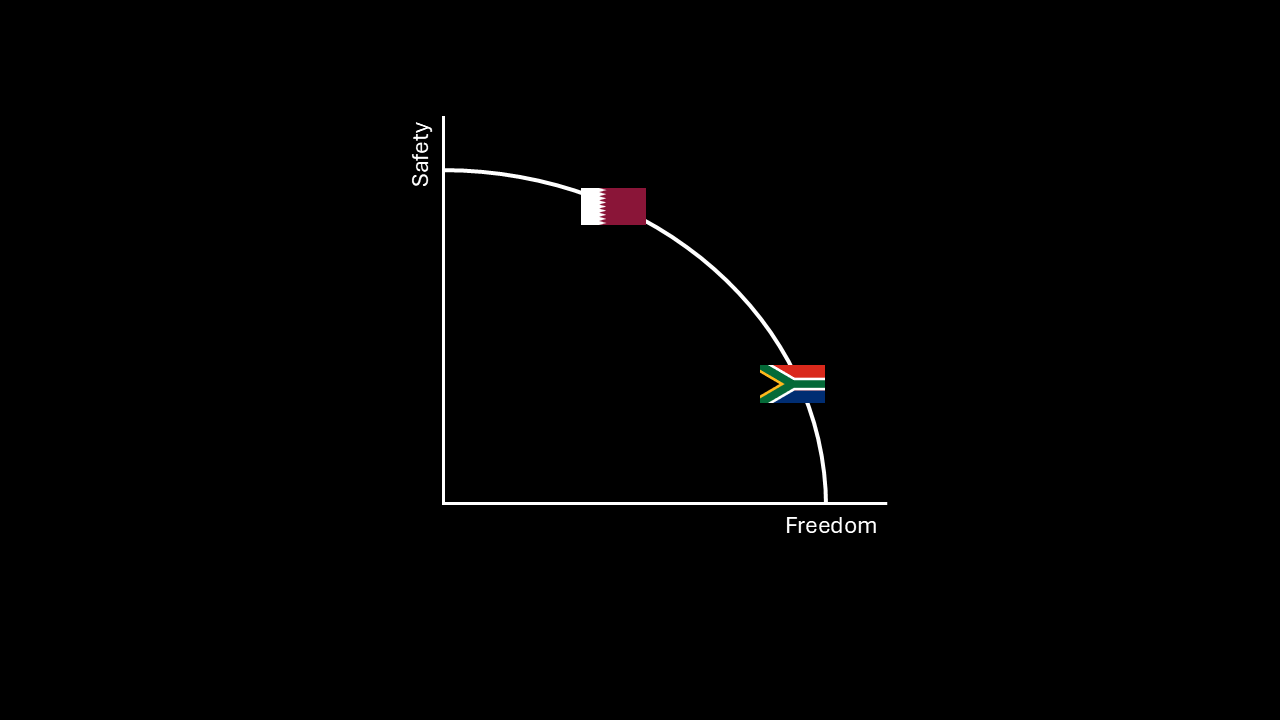


### Abstract
This study investigates the relationship between freedom and safety across 152 countries by analyzing data from World Population Review. Utilizing an Ordinary Least Squares (OLS) regression model, we examine whether increased freedom levels are associated with greater peacefulness, a proxy for safety. Our findings reveal a statistically significant inverse relationship between freedom and peacefulness, suggesting that greater freedom may correlate with reduced safety in certain contexts. We contextualize these results further using a Production Possibility Frontier (PPF) analysis and a comparative case study between South Africa and Qatar, highlighting that increased freedom does not always lead to improved safety outcomes. This study draws to attention the need for balanced policymaking that considers the complex dynamics between freedom and societal safety.

### Introduction
Freedom and safety are commonly viewed as cornerstones of a stable and prosperous society. However, the relationship between these two variables remains a topic of debate, with conflicting opinions on whether more freedom inevitably leads to greater safety. This study seeks to address this question through quantitative analysis, leveraging data on freedom and peacefulness indices from 152 countries worldwide. We conduct an Ordinary Least Squares (OLS) regression analysis to explore the statistical correlation between freedom and safety, with peacefulness serving as a proxy for the latter. Additionally, we incorporate a Production Possibility Frontier (PPF) analysis to visually represent the relationship between freedom and safety. Inspired by a personal motivation, this research aims to contribute to the ongoing discourse on the freedom-safety balance and provide actionable insights for policymakers in high-risk regions.

### Methodology

#### Data Collection
Data for this analysis was obtained from World Population Review, including 152 countries with available freedom and safety indices. The primary variables of interest were the "freedom" score (indicating the level of freedom within a country) and the "peaceful" score (used as a proxy for safety).

#### Statistical Analysis
An Ordinary Least Squares (OLS) regression model was used to examine the relationship between freedom and peacefulness. The model is specified as follows:

$$
\text{peaceful} = \alpha + \lambda \times \text{freedom} + \epsilon
$$

where:

* $\alpha$ = intercept
* $\lambda$ = coefficient of freedom
* $\epsilon$ = error term

Key metrics from the OLS model include the R-squared value, F-statistic, and p-values, which help assess the strength and statistical significance of the relationship between freedom and peacefulness.

### Results

#### Regression Analysis

The regression results indicate the following:

* **R-squared: 0.544**, showing that approximately 54.4% of the variance in peacefulness is explained by the freedom score.
* **Coefficient (freedom): -0.7374**, suggesting a negative association between freedom and peacefulness.
* **F-statistic**: 178.8 with a p-value of 2.43e-27, confirming the model's statistical significance.

These results imply that, on average, as freedom increases, peacefulness decreases, challenging the notion that higher freedom levels necessarily lead to safer societies. However, it is essential to note that other factors may also influence safety dynamics.


Pearson's correlation: -0.7374
                            OLS Regression Results                            
Dep. Variable:               peaceful   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     178.8
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.43e-27
Time:                        14:12:57   Log-Likelihood:                -156.04
No. Observations:                 152   AIC:                             316.1
Df Residuals:                     150   BIC:                             322.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.622e-16

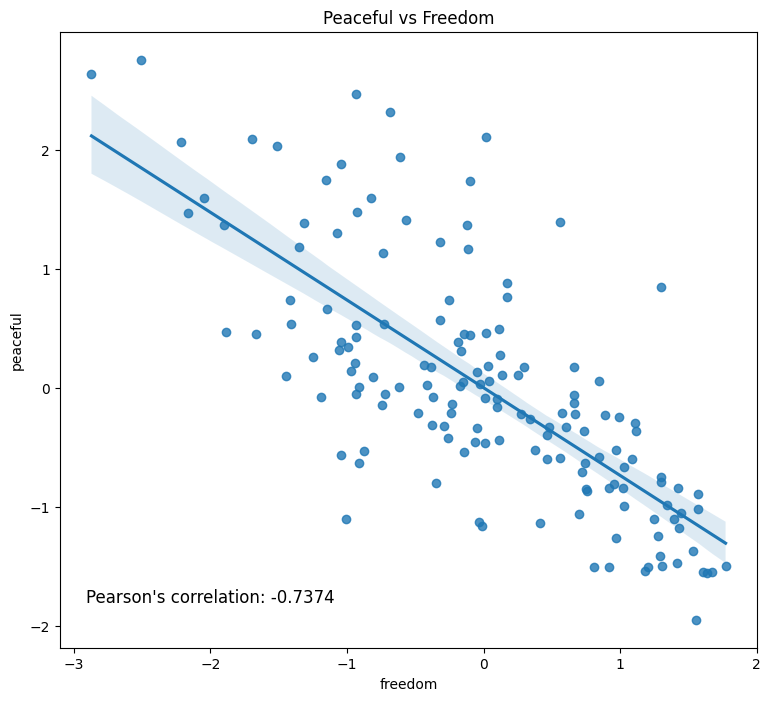

In [ ]:
# Import libraries for correlation analysis, modeling, and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load and merge datasets
df = pd.merge(pd.read_csv('freedom.csv'), pd.read_csv('safety.csv'), on='country')

# Drop unnecessary columns and rename the relevant ones
data_country = (
    df.drop(columns=['MostPeaceful2022GPI', 'MostPeaceful2021GPI'])
      .rename(columns={
          'freedomIndexByCountry_humanFreedom2023': 'freedom',
          'MostPeaceful2023GPI': 'peaceful'
      })
)

# Create a DataFrame excluding country-specific columns
data = data_country.drop(columns=['country', 'freedomIndexByCountry_persFreedom2023', 'freedomIndexByCountry_econFreedom2023'])

# Normalize the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Compute and display Pearson's correlation
corr, _ = pearsonr(data_scaled['peaceful'], data_scaled['freedom'])
print(f"Pearson's correlation: {corr:.4f}")

# Perform regression analysis predicting peacefulness from freedom
import statsmodels.api as sm

X = sm.add_constant(data_scaled['freedom'])  # Add a constant for the intercept
y = data_scaled['peaceful']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

# Plot the correlation
plt.figure(figsize=(9, 8))
sns.regplot(data=data_scaled, x='freedom', y='peaceful')
plt.title('Peaceful vs Freedom')
plt.text(-2, -1.8, f"Pearson's correlation: {corr:.4f}", fontsize=12, ha='center')
plt.show()

### PPF Analysis

For enhanced interpretability, we represent the relationship between freedom and safety using a Production Possibility Frontier (PPF) analysis. Using Pearson correlation as a coefficient in a quadratic function, the resulting equation is:

$$
S_c(F_c) = 1 - \lambda F_c^2
$$

Where:
* $S_c$ = Safety of the country
* $F_c$ = Freedom of the country
* $\lambda$ = 0.7374

This visualisation helps illustrate the diminishing returns of freedom on safety, as shown below.

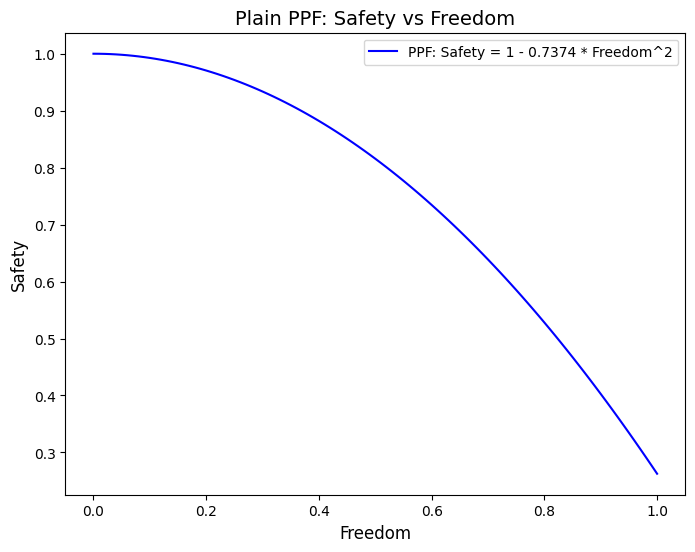

In [ ]:
# Define the safety function
def safety(freedom):
    return 1 - 0.7374 * freedom**2

# Generate freedom values for the PPF
freedom = np.arange(0, 1.01, 0.01)
safety_values = safety(freedom)

# Load and process the data
freedom_df = pd.read_csv('freedom.csv')  # Replace with your file path
freedom_df['Freedom'] = MinMaxScaler((0, 1)).fit_transform(freedom_df[['freedomIndexByCountry_humanFreedom2023']])
freedom_df_2 = freedom_df[freedom_df['country'].isin(['Qatar', 'South Africa'])].copy()
freedom_df_2['Safety'] = safety(freedom_df_2['Freedom'])

# Function to plot PPF with optional country data
def plot_ppf(include_countries=False):
    plt.figure(figsize=(8, 6))
    plt.plot(freedom, safety_values, label='PPF: Safety = 1 - 0.7374 * Freedom^2', color='blue')

    if include_countries:
        country_colors = {'South Africa': 'green', 'Qatar': 'maroon'}
        for _, row in freedom_df_2.iterrows():
            plt.scatter(row['Freedom'], row['Safety'], color=country_colors.get(row['country'], 'red'), zorder=5)
            plt.text(row['Freedom'], row['Safety'],
                     f" {row['country']} ({row['Freedom']:.2f}, {row['Safety']:.2f})",
                     fontsize=9, verticalalignment='bottom')
        plt.title('PPF with Country Comparison: South Africa vs Qatar', fontsize=14)
    else:
        plt.title('Plain PPF: Safety vs Freedom', fontsize=14)

    plt.xlabel('Freedom', fontsize=12)
    plt.ylabel('Safety', fontsize=12)
    plt.legend()
    plt.grid(False)
    plt.show()

# Plot 1: Plain PPF
plot_ppf(include_countries=False)

### Application

This section reflects the personal experience that motivated this research. As an uncle to a niece in a country considered dangerous by international standards, I felt an urgency to understand the link between freedom and safety to provide insights for decision-makers in such regions.

#### A Closer Look: "Testimonial" Highlights

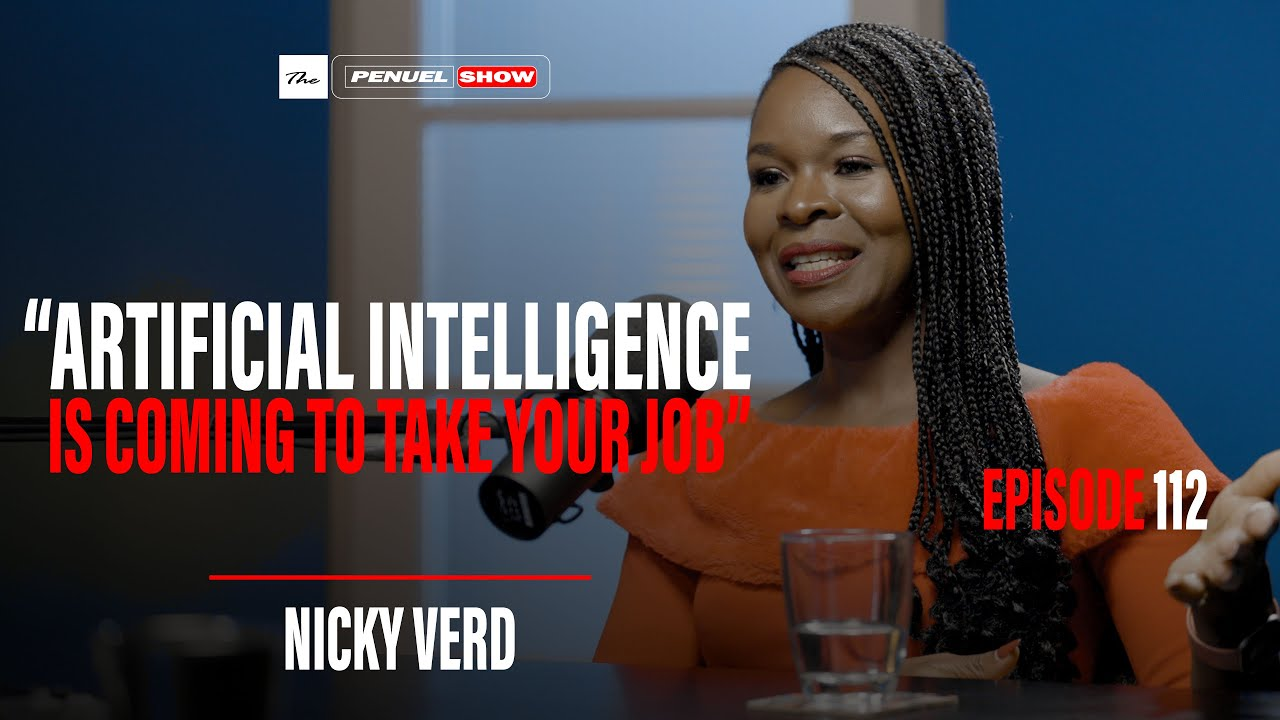

*Video Summary:* This research was inspired by a conversation between Penuel and Nicky Verd on The Penuel Show, titled "Embrace Tech Change, AI Activism, Women in Tech." Around the 26:20 mark, they discuss the significant safety differences between Qatar and South Africa, particularly regarding women’s safety. This sparked the idea to compare these two countries, exploring how freedom and safety intersect in different sociopolitical contexts. The discussion motivated a closer examination of the freedom-safety relationship to test whether similar patterns hold across other nations. [Watch the video here.](https://youtu.be/3VD6qweYyIM?si=PvV9zg6LhFdLjKTi&t=1577)

#### Comparative Analysis: South Africa vs. Qatar

To gain further insight, we compared two countries with significantly different levels of freedom and safety: South Africa and Qatar.

This comparison reveals that South Africa, despite having a higher freedom score (0.6545), shows lower safety (0.6842) compared to Qatar, which, with a lower freedom score (0.4017), exhibits higher safety (0.8811). This contrast highlights the complex nature of the freedom-safety relationship, where increased freedom does not always equate to greater safety, emphasizing the need for a nuanced approach to policymaking.

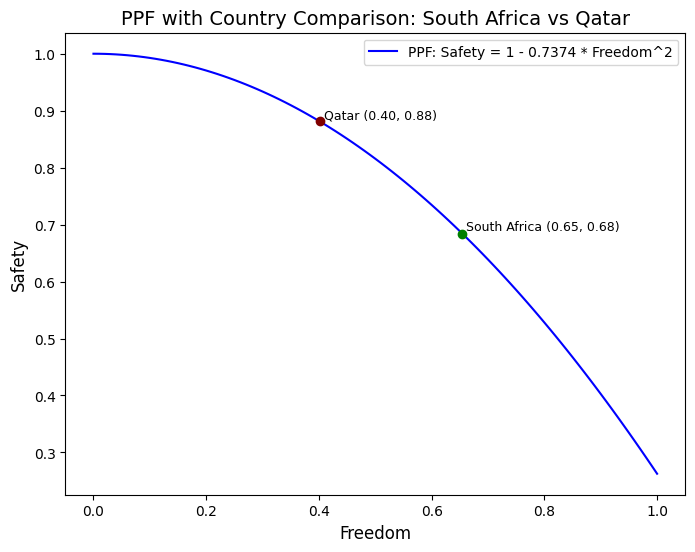

In [ ]:
# Plot 2: PPF with country comparison
plot_ppf(include_countries=True)

#### Crime Statistics

In terms of violent crime, South Africa exhibits significantly higher rates of homicide, assault, and kidnapping compared to Qatar. This disparity supports the initial finding that greater freedom does not necessarily correlate with greater safety. In South Africa, the prevalence of violent crimes suggests that, while citizens may enjoy higher levels of freedom, the lack of corresponding safety measures leads to a compromised sense of security. Conversely, Qatar’s restrictive freedom score coincides with lower violent crime rates, illustrating the complex trade-offs between freedom and public safety.

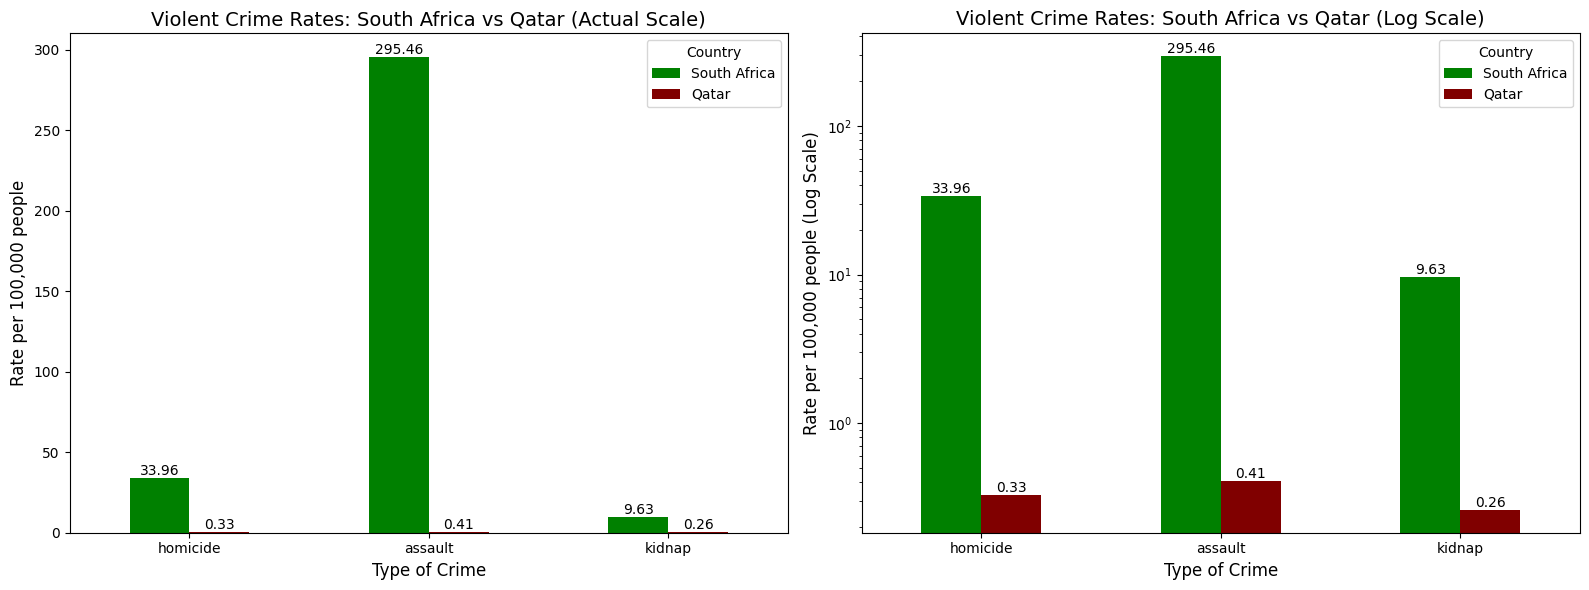

In [ ]:
def clean_data(df):
    # Filter countries and rename columns with a loop
    df = df[df['country'].isin(['Qatar', 'South Africa'])]
    rename_cols = {
        'violentCrimeRatesByCountry_homRate': 'homicide',
        'violentCrimeRatesByCountry_assault': 'assault',
        'violentCrimeRatesByCountry_kidnap': 'kidnap'
    }
    df = df.rename(columns=rename_cols)

    # Drop specified columns
    drop_cols = [col for col in df.columns if 'Year' in col or 'robbery' in col or 'sexViolence' in col]
    return df.drop(columns=drop_cols)

# Load data and apply cleaning
df = pd.read_csv('violent-crime.csv')
sa_vs_qatar = clean_data(df.copy())

# Prepare data for plotting
sa_vs_qatar_numeric = sa_vs_qatar.set_index('country').apply(pd.to_numeric, errors='coerce')
colors = {'South Africa': 'green', 'Qatar': 'maroon'}

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
titles = ['Violent Crime Rates: South Africa vs Qatar (Actual Scale)',
          'Violent Crime Rates: South Africa vs Qatar (Log Scale)']
scales = [None, 'log']

# Generate plots using a loop
for i, ax in enumerate(axes):
    sa_vs_qatar_numeric.T.plot(kind='bar', ax=ax, color=[colors[country] for country in sa_vs_qatar_numeric.index], logy=(scales[i]=='log'))
    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel(f'Rate per 100,000 people{(" (Log Scale)" if scales[i]=="log" else "")}', fontsize=12)
    ax.set_xlabel('Type of Crime', fontsize=12)
    ax.tick_params(axis='x', rotation=0)
    ax.legend(title='Country')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

#### Women’s Safety

The analysis also explored specific safety metrics for women, examining rates of femicide and general safety perception.

Interestingly, despite South Africa's relatively higher freedom score, it ranks as one of the most dangerous places for women, while Qatar shows significantly lower femicide rates with a higher peaceful rate for women.

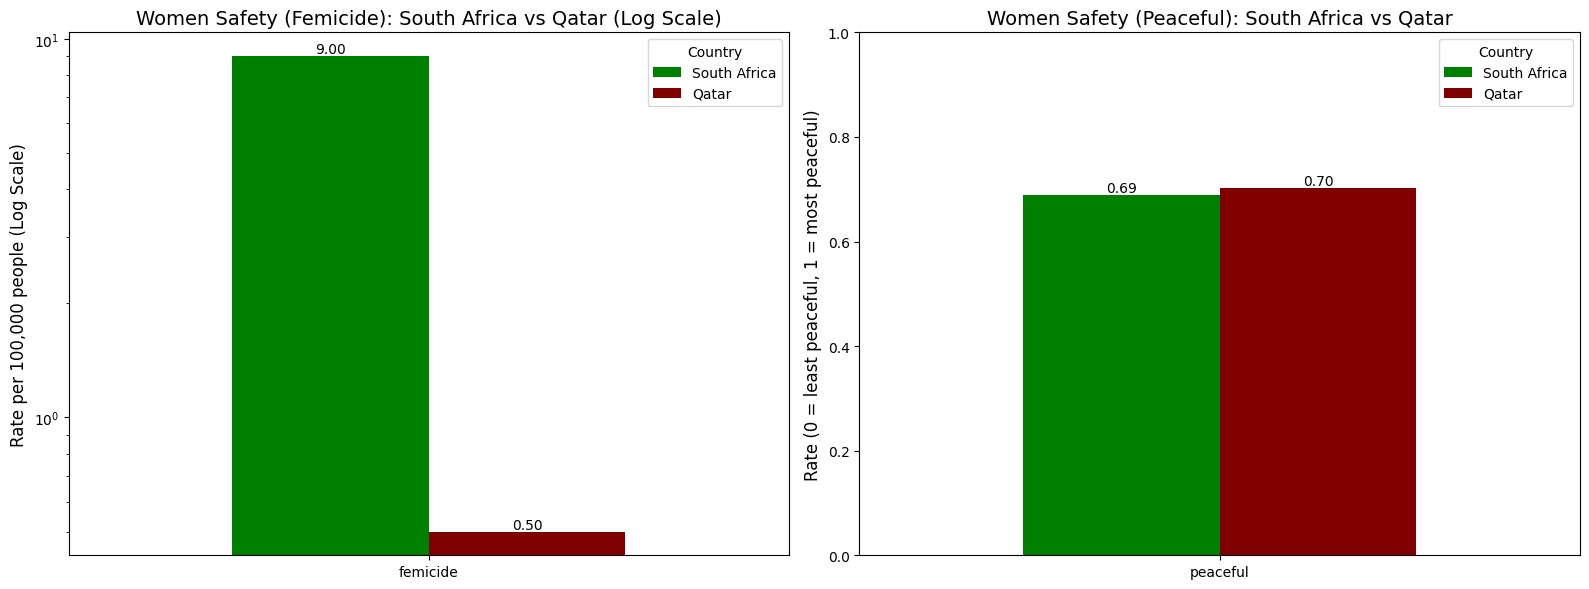

In [ ]:
def clean_data(df, drop_cols, rename_cols):
    # Drop specified columns and rename using dictionaries
    df = df.drop(columns=drop_cols).rename(columns=rename_cols)
    return df

# Load data, clean, and filter by country
df_femicide = pd.read_csv('femicide.csv')
femicide_cols = {'femicideRatesByCountry_rate': 'femicide'}
femicide = clean_data(df_femicide.copy(), ['FemicideRatesByCountryYearOfData'], femicide_cols)
femicide = femicide[femicide['country'].isin(['South Africa', 'Qatar'])]

df_dangerous = pd.read_csv('most-dangerous-for-women.csv')
dangerous_cols = {'MostDangerousCountriesForWomen_WomenPeaceAndSecurityIndex_Score_2023': 'peaceful'}
dangerous = clean_data(df_dangerous.copy(), [
    'MostDangerousCountriesForWomen_WomensDangerIndexWDI_TotalScore_2019',
    'MostDangerousCountriesForWomen_WDIStreetSafety_2019',
    'MostDangerousCountriesForWomen_WDIIntentionalHomicide_2019',
    'MostDangerousCountriesForWomen_WDINonPartnerViolence_2019',
    'MostDangerousCountriesForWomen_WDIIntimatePartnerViolence_2019',
    'MostDangerousCountriesForWomen_WDILegalDiscrimination_2019',
    'MostDangerousCountriesForWomen_WDIGlobalGenderGap_2019',
    'MostDangerousCountriesForWomen_WDIGenderInequality_2019',
    'MostDangerousCountriesForWomen_WDIAttitudesTowardViolence_2019'
], dangerous_cols)
dangerous = dangerous[dangerous['country'].isin(['South Africa', 'Qatar'])]

# Merge dataframes by 'country'
femicide_dangerous = pd.merge(femicide, dangerous, on='country').set_index('country')

# Define colors and create plots
colors = {'South Africa': 'green', 'Qatar': 'maroon'}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
titles = ['Women Safety (Femicide): South Africa vs Qatar (Log Scale)',
          'Women Safety (Peaceful): South Africa vs Qatar']
y_labels = ['Rate per 100,000 people (Log Scale)', 'Rate (0 = least peaceful, 1 = most peaceful)']
vars_to_plot = ['femicide', 'peaceful']
y_lims = [None, (0, 1)]
scales = [True, False]

# Plot using a loop
for i, ax in enumerate([ax1, ax2]):
    femicide_dangerous[[vars_to_plot[i]]].T.plot(
        kind='bar',
        ax=ax,
        color=[colors[country] for country in femicide_dangerous.index],
        logy=scales[i],
        width=0.6
    )
    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel(y_labels[i], fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(title='Country')
    ax.grid(False)
    if y_lims[i]:
        ax.set_ylim(y_lims[i])
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

### Causation Analysis

#### Feature Impotance Analysis

The Elastic Net model's feature analysis reveals significant insights into the impact of various criminal and institutional factors on freedom scores. Key features include the influence of "Non-state actors," which exhibits the highest level of importance, highlighting the role of non-governmental entities in shaping freedom levels. This factor is followed closely by "Human trafficking" and "Cocaine trade," both of which indicate that illicit markets and organized crime substantially affect societal freedoms.

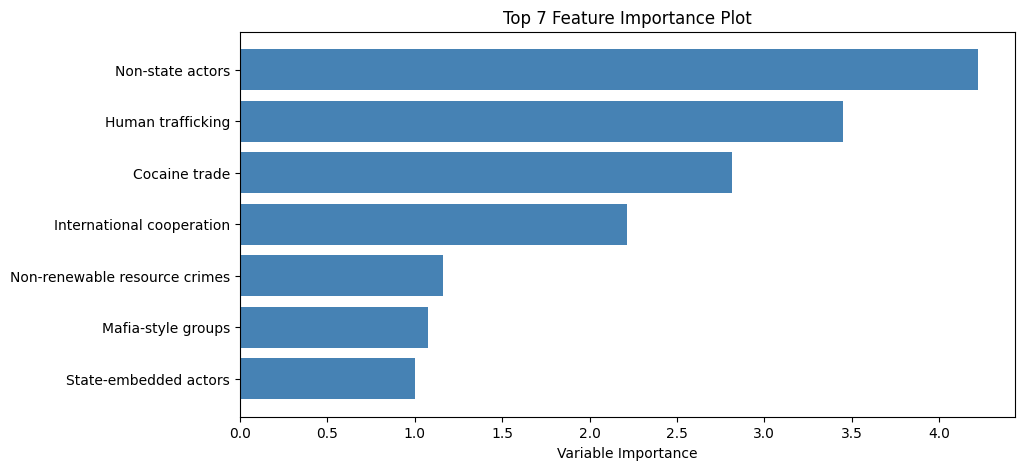

In [ ]:
# Load data
data = pd.read_csv('data_ml.csv')
X, y = data.drop(columns=["Freedom"]), data["Freedom"]

# Split data and train ElasticNet model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0).fit(X_train, y_train)

# Calculate and plot top 7 feature importances
top_features = pd.DataFrame({
    "Features": X.columns,
    "Importance": np.abs(model.coef_)
}).nlargest(7, "Importance")

plt.figure(figsize=(10, 5))
plt.barh(top_features["Features"], top_features["Importance"], color="steelblue")
plt.xlabel("Variable Importance")
plt.title("Top 7 Feature Importance Plot")
plt.gca().invert_yaxis()
plt.show()

#### OLS Analysis

The OLS regression results support these observations, with an R-squared value of 0.829, explaining approximately 83% of the variation in freedom scores. High standard errors and multicollinearity issues indicate complexities in isolating the effects of individual predictors, suggesting that both non-state criminal activities and governance structures are central to understanding freedom variations. (See Appendix 2)

In [ ]:
# OLS regression for predicting 'Freedom' from all features
X_ols = sm.add_constant(X)
model_ols = sm.OLS(y, X_ols).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Freedom   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     21.00
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.84e-41
Time:                        14:18:47   Log-Likelihood:                -720.14
No. Observations:                 182   AIC:                             1510.
Df Residuals:                     147   BIC:                             1622.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### Discussion

The findings suggest an inverse relationship between freedom and safety, challenging common assumptions about their interplay. The regression analysis showed a statistically significant negative coefficient, indicating that increased freedom correlates with lower peacefulness levels.

This outcome has implications for both theoretical understanding and practical policymaking. The PPF analysis further illustrates this trade-off, showing that after a certain threshold, additional freedoms may diminish societal stability. The Elastic Net analysis also underscores the influence of non-state actors and illicit markets on freedom metrics, suggesting that policies aimed at reducing crime and enhancing governance may support both freedom and safety objectives.

Nonetheless, the study's limitations, including multicollinearity and lack of direct controls for cultural or socioeconomic variables, mean that these findings should be interpreted with caution.

### Conclusion

Our analysis reveals a nuanced inverse relationship between freedom and safety, challenging the assumption that higher freedom inherently leads to safer societies. Comparative insights from countries like South Africa and Qatar highlight the complex dynamics at play, suggesting a balanced approach to policymaking. These findings advocate for a governance model that strengthens both freedom and safety, enabling environments where individuals can experience freedom without compromising security.

### References

1. **World Population Review**. (2024). Violent Crime Rates by Country 2024. Retrieved from https://worldpopulationreview.com/country-rankings/violent-crime-rates-by-country
2. **World Population Review**. (2024). Most Dangerous Countries for Women 2024. Retrieved from https://worldpopulationreview.com/country-rankings/most-dangerous-countries-for-women
3. **World Population Review**. (2024). Femicide Rates by Country 2024. Retrieved from https://worldpopulationreview.com/country-rankings/femicide-rates-by-country
4. **Penuel and Verd**, N. (2024). The Penuel Show - Embrace Tech Change, AI Activism, Women in Tech. Available at: https://youtu.be/3VD6qweYyIM.
5. **Elastic Net Regression Methodology**. Zou, H., & Hastie, T. (2005). Regularization and variable selection via the elastic net. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 67(2), 301-320.

#### _AI Assistance Disclaimer_
This article benefited from the use of OpenAI’s ChatGPT for assistance in drafting, editing, and refining certain sections. All final content, interpretations, and conclusions are solely the responsibility of the author, Ali Denewade.